# Main correlation matrix

During the feature selection part of the model,
we figured out that very different sets of features were chosen
in different runs. Hence, a decision was made to search
or highly correlated features among all the features
in the dataset.

The following code looks for highly correlated features in the
model's input data.

In [1]:
%load_ext jupyter_black

In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn


In [3]:
df = pd.read_csv("data/510_data.csv", index_col=0)
df

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_LightRoof_StrongWall,VUL_LightRoof_LightWall,VUL_LightRoof_SalvageWall,VUL_SalvagedRoof_StrongWall,VUL_SalvagedRoof_LightWall,VUL_SalvagedRoof_SalvageWall,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg,HAZ_v_max_3
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,2.533055,41.892832,1.002088,0.000000,0.027836,0.083507,2.951511,46.931106,3.632568,166667.757548
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,1.218595,13.645253,0.549120,0.030089,0.090266,0.112833,3.338873,25.989168,0.000000,664.968323
4,PH015501000,durian2006,24.175000,2.408333,0.957639,10.945624,274.953818,1.52,1.28,1.28,...,0.667374,15.592295,0.075838,0.000000,0.015168,0.075838,2.131755,32.185651,0.000000,1311.358762
6,PH015502000,durian2006,14.930000,1.650000,0.586250,12.108701,252.828578,0.00,0.00,0.00,...,0.675125,7.100454,0.023280,0.011640,0.000000,0.128041,1.589369,29.612385,0.000000,1775.385328
7,PH175302000,durian2006,13.550000,1.054167,0.528125,10.660943,258.194381,5.52,0.36,0.36,...,0.821288,30.354796,0.000000,0.000000,0.032852,0.000000,1.387007,35.052562,0.000000,1211.676901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,PH084823000,noul2015,9.700000,0.408333,0.216146,8.136932,277.107823,1.80,6.25,6.25,...,3.613707,32.492212,0.311526,0.031153,0.155763,0.031153,2.827833,31.308411,0.000000,538.743551
25837,PH015547000,noul2015,17.587500,1.414583,0.386458,9.818999,305.789817,0.00,0.00,0.00,...,0.383275,4.703833,0.027875,0.000000,0.034843,0.097561,1.073268,12.766551,0.000000,946.676507
25838,PH025014000,noul2015,11.487500,0.614583,0.230319,15.791907,210.313249,0.06,0.09,0.09,...,0.090110,3.063753,0.022528,0.000000,0.067583,0.022528,1.140109,9.348952,0.000000,3938.254316
25839,PH140127000,noul2015,11.600000,1.400000,0.412766,13.867145,218.189328,0.00,0.00,0.00,...,0.094518,3.119093,0.000000,0.000000,0.000000,0.000000,2.837537,21.928166,0.000000,2666.620370


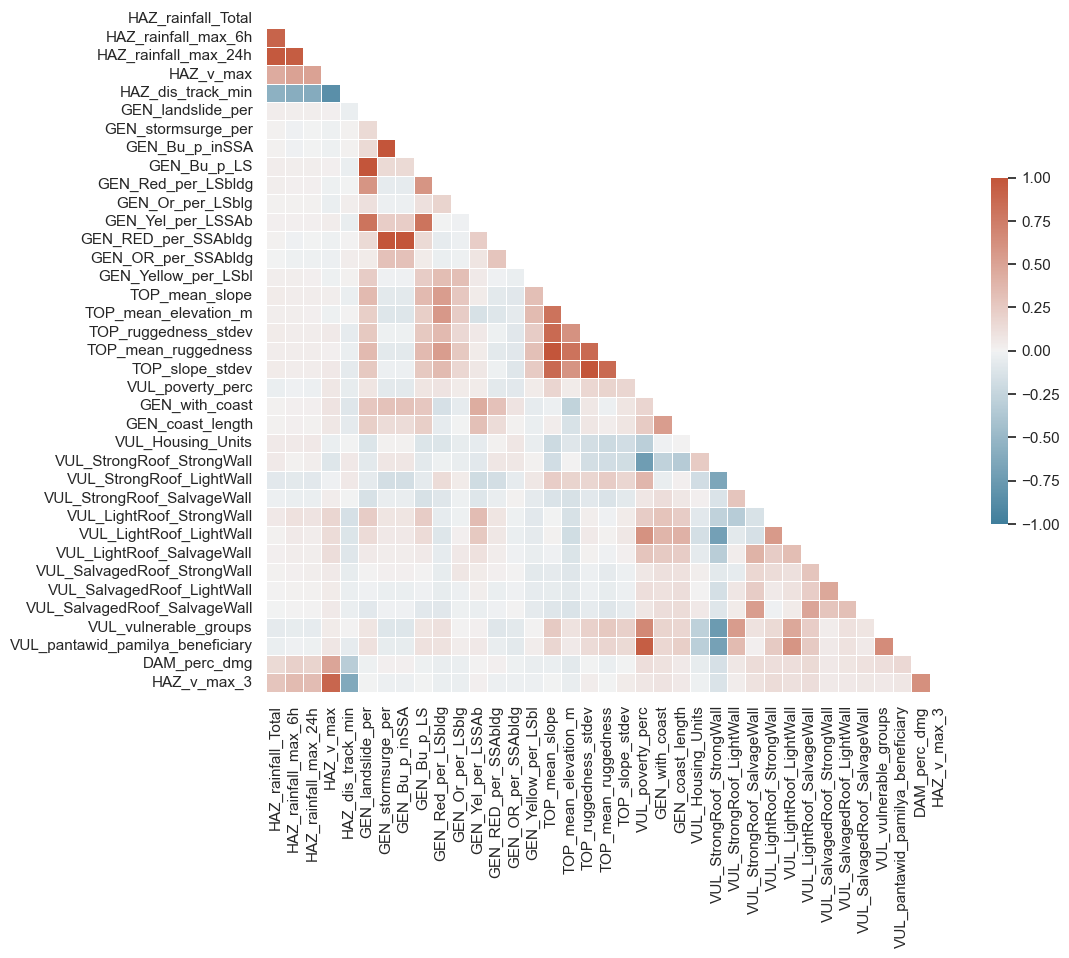

In [4]:
sn.set_theme(style="white")

corrMatrix = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(
    corrMatrix,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.savefig("corr_matrix3.pdf", bbox_inches="tight")